<a href="https://colab.research.google.com/github/HovhannesArustamyan/linear_regresssion_imdb_score_/blob/master/task_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV


In [2]:
df = pd.read_csv('/content/drive/MyDrive/movie_metadata.csv')


***Visualization of nan values***

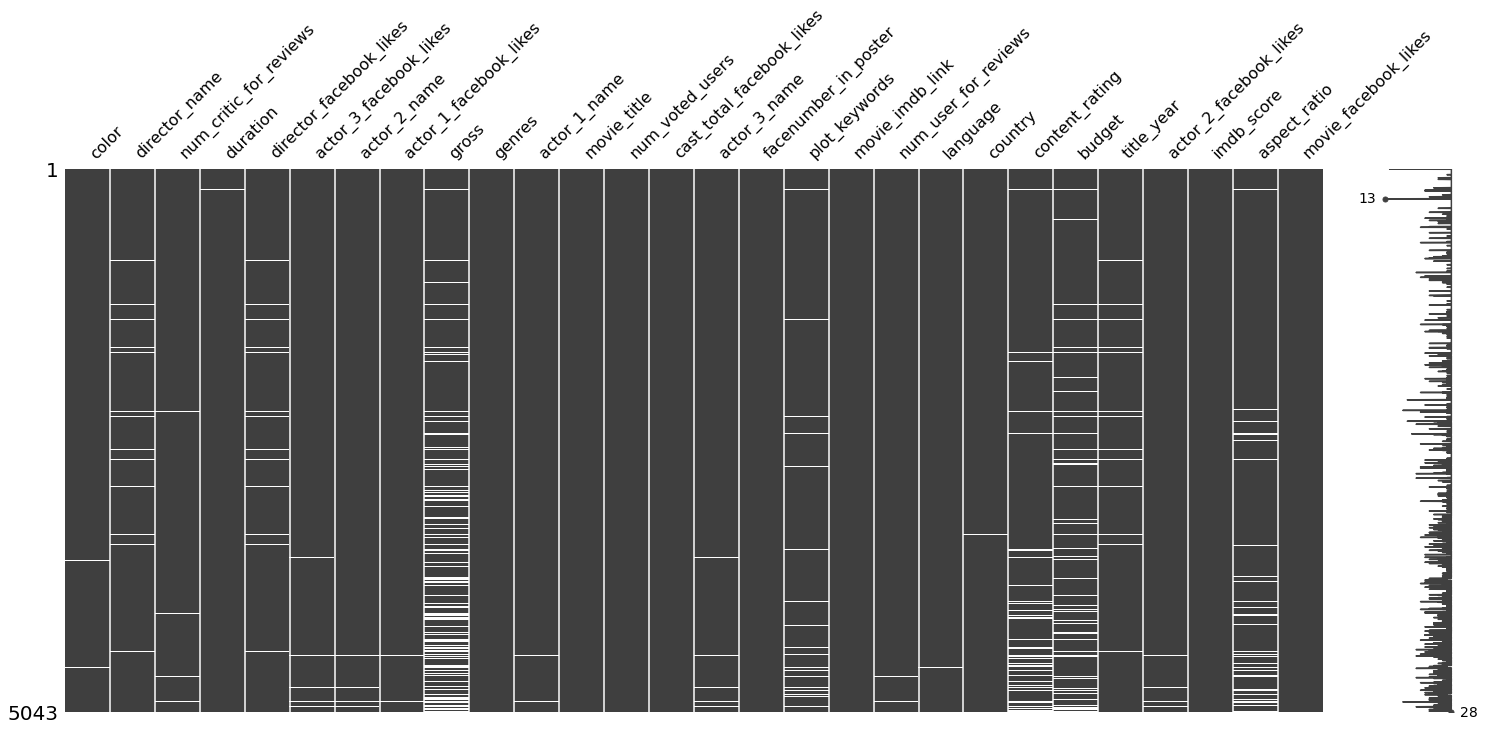

In [3]:
def nanvalues(df):
  msno.matrix(df)
  
nanvalues(df)  

In [4]:
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [5]:
df_spec_columns = df.drop(['director_name','num_critic_for_reviews','director_facebook_likes','genres','actor_1_name', 'movie_title',
                      'actor_3_facebook_likes','gross', 'actor_3_name', 'facenumber_in_poster', 'actor_2_facebook_likes', 
                      'actor_1_facebook_likes','aspect_ratio','plot_keywords','country', 'content_rating',
                      'num_user_for_reviews', 'actor_2_name','movie_imdb_link','language'], axis=1)

In [6]:
df_spec_columns.isnull().sum()

color                         19
duration                      15
num_voted_users                0
cast_total_facebook_likes      0
budget                       492
title_year                   108
imdb_score                     0
movie_facebook_likes           0
dtype: int64

In [7]:
df_spec_columns = df_spec_columns[df_spec_columns['color'].notna()]
df_spec_columns

,color,duration,num_voted_users,cast_total_facebook_likes,budget,title_year,imdb_score,movie_facebook_likes
0,Color,178.0,886204,4834,237000000.0,2009.0,7.9,33000
1,Color,169.0,471220,48350,300000000.0,2007.0,7.1,0
2,Color,148.0,275868,11700,245000000.0,2015.0,6.8,85000
3,Color,164.0,1144337,106759,250000000.0,2012.0,8.5,164000
5,Color,132.0,212204,1873,263700000.0,2012.0,6.6,24000
...,...,...,...,...,...,...,...,...
5038,Color,87.0,629,2283,NaN,2013.0,7.7,84
5039,Color,43.0,73839,1753,NaN,NaN,7.5,32000
5040,Color,76.0,38,0,1400.0,2013.0,6.3,16
5041,Color,100.0,1255,2386,NaN,2012.0,6.3,660


***Changing ordinal data to numbers***

In [8]:
uniq_colors = list(np.unique(df_spec_columns.color))
uniq_colors

[' Black and White', 'Color']

In [9]:
lisst = [index for index,name in enumerate(uniq_colors)]
lisst

[0, 1]

In [10]:
df_spec_columns['color'].replace(uniq_colors , lisst, inplace=True)
df_spec_columns

,color,duration,num_voted_users,cast_total_facebook_likes,budget,title_year,imdb_score,movie_facebook_likes
0,1,178.0,886204,4834,237000000.0,2009.0,7.9,33000
1,1,169.0,471220,48350,300000000.0,2007.0,7.1,0
2,1,148.0,275868,11700,245000000.0,2015.0,6.8,85000
3,1,164.0,1144337,106759,250000000.0,2012.0,8.5,164000
5,1,132.0,212204,1873,263700000.0,2012.0,6.6,24000
...,...,...,...,...,...,...,...,...
5038,1,87.0,629,2283,NaN,2013.0,7.7,84
5039,1,43.0,73839,1753,NaN,NaN,7.5,32000
5040,1,76.0,38,0,1400.0,2013.0,6.3,16
5041,1,100.0,1255,2386,NaN,2012.0,6.3,660


In [11]:
filled_data = df_spec_columns.fillna(df_spec_columns.mean())
filled_data.isnull().sum()
filled_data

,color,duration,num_voted_users,cast_total_facebook_likes,budget,title_year,imdb_score,movie_facebook_likes
0,1,178.0,886204,4834,2.370000e+08,2009.000000,7.9,33000
1,1,169.0,471220,48350,3.000000e+08,2007.000000,7.1,0
2,1,148.0,275868,11700,2.450000e+08,2015.000000,6.8,85000
3,1,164.0,1144337,106759,2.500000e+08,2012.000000,8.5,164000
5,1,132.0,212204,1873,2.637000e+08,2012.000000,6.6,24000
...,...,...,...,...,...,...,...,...
5038,1,87.0,629,2283,3.984861e+07,2013.000000,7.7,84
5039,1,43.0,73839,1753,3.984861e+07,2002.443496,7.5,32000
5040,1,76.0,38,0,1.400000e+03,2013.000000,6.3,16
5041,1,100.0,1255,2386,3.984861e+07,2012.000000,6.3,660


***Separating data***

In [12]:
X = filled_data.drop('imdb_score', axis=1)
y = filled_data['imdb_score']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state= 42)

***Ploting correlation***

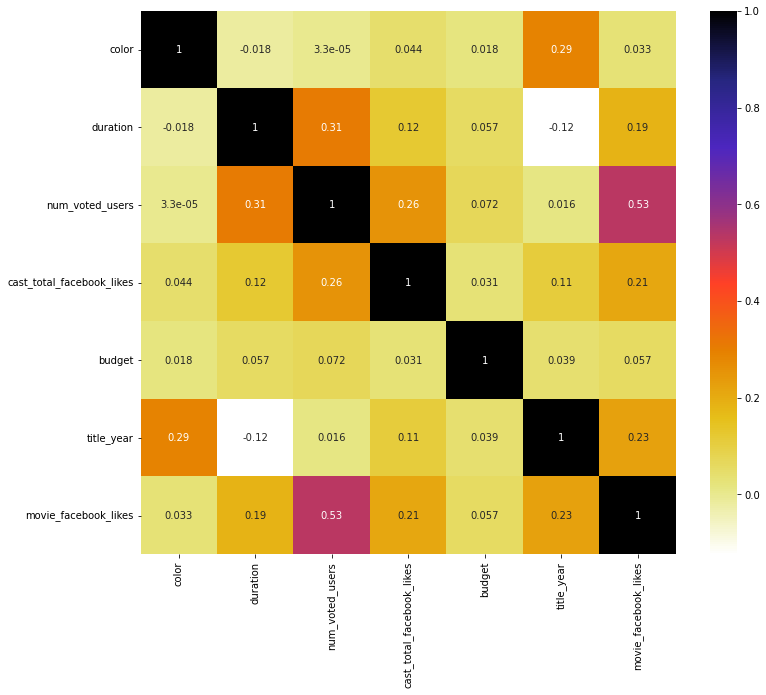

In [14]:
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor , annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge = Ridge(random_state=0)
param_grid = {'alpha': [0.1, 0.5, 0.01, 0.05, 0.001, 0.005]}
grid_search = GridSearchCV(ridge, param_grid=param_grid, cv=5, return_train_score=False)
grid_search.fit(X_train_scaled, y_train)



GridSearchCV(cv=5, estimator=Ridge(random_state=0),
             param_grid={'alpha': [0.1, 0.5, 0.01, 0.05, 0.001, 0.005]})

In [ ]:
ridge = Ridge(grid_search.best_params_['alpha'])
ridge.fit(X_train_scaled, y_train)
y_prediction = ridge.predict(X_test_scaled)
print('Mean squared error for Ridge regression is', mean_squared_error(y_test, y_prediction))
print('Root mean squared error for Ridge regression is', np.sqrt(mean_squared_error(y_test, y_prediction)))
print('R2 score for Ridge regression is', r2_score(y_test, y_prediction))

print('\n')

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_prediction = lin_reg.predict(X_test_scaled)
print('Mean squared error for Linear regression is', mean_squared_error(y_test, y_prediction))
print('Root mean squared error for Linear regression is', np.sqrt(mean_squared_error(y_test, y_prediction)))
print('R2 score for Linear regression is', r2_score(y_test, y_prediction))

Mean squared error for Ridge regression is 1.0268773181063369
Root mean squared error for Ridge regression is 1.013349553760368
R2 score for Ridge regression is 0.2109328424218314


Mean squared error for Linear regression is 1.0268816519164405
Root mean squared error for Linear regression is 1.0133516921170262
R2 score for Linear regression is 0.210929512260419
